<a href="https://colab.research.google.com/github/jameswhanger/bad_graphics/blob/master/two_covid_reproduction_estimates_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




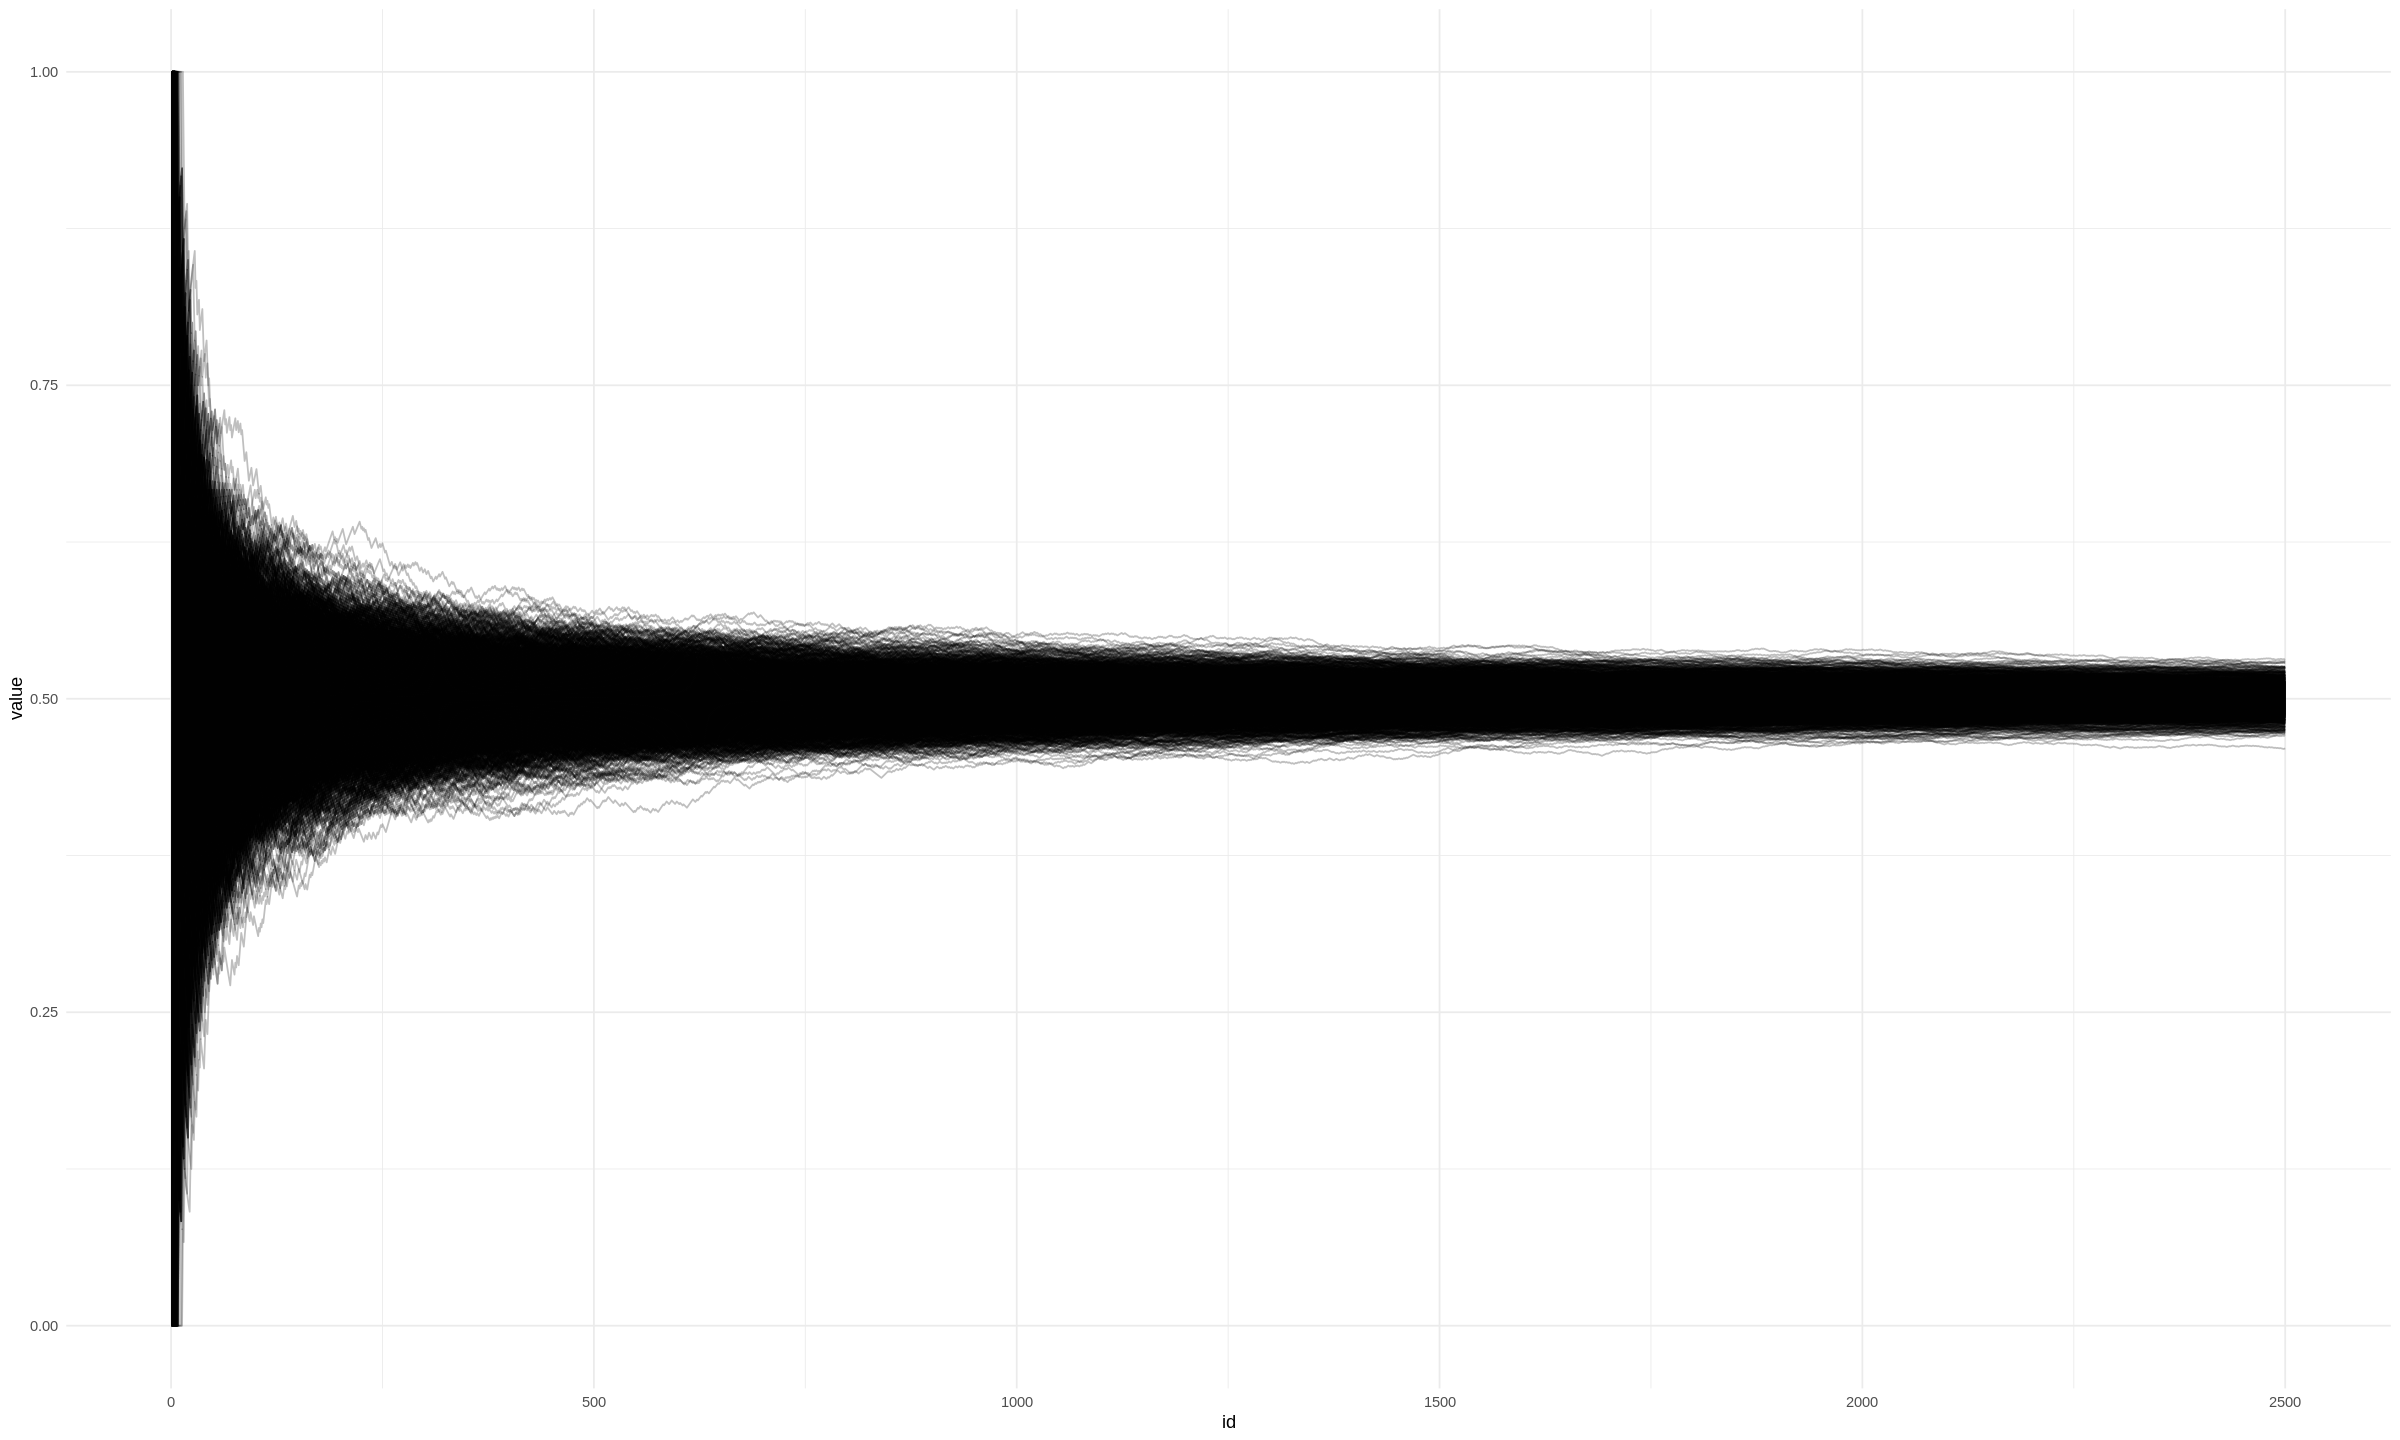

In [1]:

options(repr.plot.width=20, repr.plot.height=12)

sample.space <- c(0,1)
theta <- 0.5 # this is a fair coin
N <- 2500^2 # we want to flip a coin N times

flips <- as.numeric()

for (i in 1:N)  {
  flips[[i]] <- rbinom(n = 1, size = 1, prob = theta)
}
m <- matrix(flips, sqrt(N), sqrt(N))
df <- as.data.frame(m)

library(dplyr)
rownum_div <- function(x) (x/row_number(x))
cs <- df %>% mutate_all(., cumsum) 

library(tidyr)
prob <- cs %>% mutate_all(., rownum_div)  
prob_id <- prob %>% mutate(id = 1)  %>% 
mutate(id = cumsum(id))  %>% 
select(id, everything()) %>% 
arrange(id)  %>% 
gather(key="key", value="value", -id)

library(ggplot2)
ggplot(prob_id, aes(id, value, group=key)) + 
scale_y_continuous(limits = c(0, 1)) +
geom_line(alpha=0.25) + 
theme_minimal()



In [0]:
set.seed(1010)
#if (!require("tidyverse")) install.packages("tidyverse")
library("tidyverse")

#if (!require("deSolve")) install.packages("deSolve")
#library("deSolve")

# Preliminary setup
#install.packages('versions')
#library(versions)
# Install package CmdStanR from GitHub
#library(devtools)
#if(!require(cmdstanr)){
#  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
#  library(cmdstanr)
#}

# Load the package required to read JSON files.
if(!require("jsonlite")) {
  install.packages("jsonlite")
library("jsonlite")
}

if(!require("rio")) {
  install.packages("rio")
library("rio")
}

if(!require("ggrepel")) {
  install.packages("ggrepel")
library("ggrepel")
}

Loading required package: ggrepel

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggrepel’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
options(repr.plot.width=20, repr.plot.height=12)

library("tidyverse")
library("rio")
library("ggrepel")

df <- read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
summary(df)
sort(unique(df$iso3))
head(df)
tail(df)
str(df)
names(df)
typeof(df)
class(df)


if (anyDuplicated(names(df)) > 0) {
sort(names(df))

var1 <- names(df)[anyDuplicated(names(df))]
var2 <- paste0("duplicated_", names(df)[anyDuplicated(names(df))])

names(df)[anyDuplicated(names(df))] <- paste0("duplicated_", names(df)[anyDuplicated(names(df))])

dupe_test <- df[, c(var1, var2)]
dupe_test_cor <- cor(dupe_test[,1], dupe_test[,2])

names(df)
}
names(df)

df_long <- df %>% gather(key="date",value="value", -UID, -iso2, -iso3, -code3, -FIPS, -Admin2,
                         -Province_State, -Country_Region, -Lat, -Long_, -Combined_Key, -Population) %>%
  mutate(date = as.Date(date, "%m/%d/%y"))
head(df_long)

state <- df_long %>% filter(Province_State %in% c("") & value > 0)
state

ggplot(data=state, aes(as.numeric(Long_), as.numeric(Lat), color=value, label=paste(value))) +
  xlab("Longitude") + ylab("Latitude") +
  geom_point(size=1/100) +
  geom_label_repel() +
  theme_bw() +
  #scale_color_hue(l=25) +
  facet_wrap(  ~ Province_State, scale="free")
# facet_grid( ~ Case_Type )


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [0]:
library("dplyr")
library("tibble")
library("tidyr")
library("ggplot2")

df <- as.data.frame(matrix(runif(14, 1, 150))) %>% 
  rownames_to_column() %>% 
  gather(key="key", value="value", -rowname) %>% 
  mutate(group1 = rowname,
         group2 = as.numeric(gsub("V", "", key))) %>% 
  ungroup() %>%
  arrange(value) 
  
df 


rowname,key,value,group1,group2
<chr>,<chr>,<dbl>,<chr>,<dbl>
3,V1,5.923128,3,1
4,V1,13.969495,4,1
5,V1,23.229674,5,1
13,V1,23.379643,13,1
1,V1,58.732936,1,1
9,V1,66.782554,9,1
11,V1,94.746998,11,1
6,V1,107.535437,6,1
12,V1,108.324629,12,1


In [0]:
# Give the input file name to the function.
json_data <- read_json("https://covidtracking.com/api/v1/states/daily.json",
simplifyVector=TRUE)
#df_json <- fromJSON(file = "daily.csv")

# Print the result.
#head(df_json)

head(json_data, n=10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,⋯,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,20200518,AK,399,35212,NA,9,NA,NA,NA,NA,⋯,NA,35611,35611,35611,02,0,0,957,3,960
2,20200518,AL,12086,145037,NA,NA,1416,NA,512,NA,⋯,1416,157123,157123,157123,01,1,24,458,315,773
3,20200518,AR,4813,80426,NA,77,530,NA,NA,12,⋯,530,85239,85239,85239,05,2,10,0,54,54
4,20200518,AS,0,105,NA,NA,NA,NA,NA,NA,⋯,NA,105,105,105,60,0,0,0,0,0
5,20200518,AZ,14170,142303,NA,820,1717,329,NA,200,⋯,1717,156473,156473,156473,04,6,18,4479,233,4712
6,20200518,CA,80430,1212242,NA,4391,NA,1325,NA,NA,⋯,NA,1292672,1292672,1292672,06,41,0,55838,1591,57429
7,20200518,CO,21938,106557,NA,650,3872,NA,NA,NA,⋯,3872,128495,128495,128495,08,23,6,2642,305,2947
8,20200518,CT,38116,139563,NA,920,10946,NA,NA,NA,⋯,10946,177679,177679,177679,09,41,0,6375,697,7072
9,20200518,DC,7270,30555,NA,374,NA,NA,NA,70,⋯,NA,37825,37825,37825,11,9,0,1152,147,1299


In [0]:
library("lubridate")
json_data <- json_data %>% 
 mutate(yr = substr(as.character(date), 1, 4), mo=substr(as.character(date), 5, 6), dy=substr(as.character(date), 7, 8)) %>% 
mutate(dt=as.Date(paste0(yr,"-",mo,"-",dy), "%Y-%m-%d"),
wk = floor_date(dt, unit="week"))
 
names(json_data)
sort(unique(json_data$wk))



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] "date"                     "state"                   
 [3] "positive"                 "negative"                
 [5] "pending"                  "hospitalizedCurrently"   
 [7] "hospitalizedCumulative"   "inIcuCurrently"          
 [9] "inIcuCumulative"          "onVentilatorCurrently"   
[11] "onVentilatorCumulative"   "recovered"               
[13] "dataQualityGrade"         "lastUpdateEt"            
[15] "hash"                     "dateChecked"             
[17] "death"                    "hospitalized"            
[19] "total"                    "totalTestResults"        
[21] "posNeg"                   "fips"                    
[23] "deathIncrease"            "hospitalizedIncrease"    
[25] "negativeIncrease"         "positiveIncrease"        
[27] "totalTestResultsIncrease" "yr"                      
[29] "mo"                       "dy"                      
[31] "dt"                       "wk"

[1] "2020-01-19" "2020-01-26" "2020-02-02" "2020-02-09" "2020-02-16"
 [6] "2020-02-23" "2020-03-01" "2020-03-08" "2020-03-15" "2020-03-22"
[11] "2020-03-29" "2020-04-05" "2020-04-12" "2020-04-19" "2020-04-26"
[16] "2020-05-03" "2020-05-10" "2020-05-17"

In [0]:
library("tidyverse")
df <- read_csv("https://covidtracking.com/api/states/daily.csv",  
 col_types=cols(
  date = col_double(),
  state = col_character(),
  positive = col_double(),
  negative = col_double(),
  pending = col_double(),
  hospitalizedCurrently = col_double(),
  hospitalizedCumulative = col_double(),
  inIcuCurrently = col_double(),
  inIcuCumulative = col_double(),
  onVentilatorCurrently = col_double(),
  onVentilatorCumulative = col_double(),
  recovered = col_double(),
  dataQualityGrade = col_character(),
  lastUpdateEt = col_character(),
  hash = col_character(),
  dateChecked = col_datetime(format = ""),
  death = col_double(),
  hospitalized = col_double(),
  total = col_double(),
  totalTestResults = col_double(),
  posNeg = col_double(),
  fips = col_character(),
  deathIncrease = col_double(),
  hospitalizedIncrease = col_double(),
  negativeIncrease = col_double(),
  positiveIncrease = col_double(),
  totalTestResultsIncrease = col_double()
))

In [0]:
head(df, n=10)
tail(df, n=10)


date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,⋯,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20200518,AK,399,35212,NA,9,NA,NA,NA,NA,⋯,NA,35611,35611,35611,02,0,0,957,3,960
20200518,AL,12086,145037,NA,NA,1416,NA,512,NA,⋯,1416,157123,157123,157123,01,1,24,458,315,773
20200518,AR,4813,80426,NA,77,530,NA,NA,12,⋯,530,85239,85239,85239,05,2,10,0,54,54
20200518,AS,0,105,NA,NA,NA,NA,NA,NA,⋯,NA,105,105,105,60,0,0,0,0,0
20200518,AZ,14170,142303,NA,820,1717,329,NA,200,⋯,1717,156473,156473,156473,04,6,18,4479,233,4712
20200518,CA,80430,1212242,NA,4391,NA,1325,NA,NA,⋯,NA,1292672,1292672,1292672,06,41,0,55838,1591,57429
20200518,CO,21938,106557,NA,650,3872,NA,NA,NA,⋯,3872,128495,128495,128495,08,23,6,2642,305,2947
20200518,CT,38116,139563,NA,920,10946,NA,NA,NA,⋯,10946,177679,177679,177679,09,41,0,6375,697,7072
20200518,DC,7270,30555,NA,374,NA,NA,NA,70,⋯,NA,37825,37825,37825,11,9,0,1152,147,1299


date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,⋯,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20200131,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200130,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200129,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200128,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200127,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200126,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200125,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200124,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200123,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0


In [0]:
names(df)
str(df)

[1] "date"                     "state"                   
 [3] "positive"                 "negative"                
 [5] "pending"                  "hospitalizedCurrently"   
 [7] "hospitalizedCumulative"   "inIcuCurrently"          
 [9] "inIcuCumulative"          "onVentilatorCurrently"   
[11] "onVentilatorCumulative"   "recovered"               
[13] "dataQualityGrade"         "lastUpdateEt"            
[15] "hash"                     "dateChecked"             
[17] "death"                    "hospitalized"            
[19] "total"                    "totalTestResults"        
[21] "posNeg"                   "fips"                    
[23] "deathIncrease"            "hospitalizedIncrease"    
[25] "negativeIncrease"         "positiveIncrease"        
[27] "totalTestResultsIncrease"

tibble [4,161 × 27] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date                    : num [1:4161] 20200518 20200518 20200518 20200518 20200518 ...
 $ state                   : chr [1:4161] "AK" "AL" "AR" "AS" ...
 $ positive                : num [1:4161] 399 12086 4813 0 14170 ...
 $ negative                : num [1:4161] 35212 145037 80426 105 142303 ...
 $ pending                 : num [1:4161] NA NA NA NA NA NA NA NA NA NA ...
 $ hospitalizedCurrently   : num [1:4161] 9 NA 77 NA 820 ...
 $ hospitalizedCumulative  : num [1:4161] NA 1416 530 NA 1717 ...
 $ inIcuCurrently          : num [1:4161] NA NA NA NA 329 ...
 $ inIcuCumulative         : num [1:4161] NA 512 NA NA NA NA NA NA NA NA ...
 $ onVentilatorCurrently   : num [1:4161] NA NA 12 NA 200 NA NA NA 70 NA ...
 $ onVentilatorCumulative  : num [1:4161] NA 302 101 NA NA NA NA NA NA NA ...
 $ recovered               : num [1:4161] 345 NA 3645 NA 3570 ...
 $ dataQualityGrade        : chr [1:4161] "B" "B" "A" "C" ...
 $ lastUpdate

In [0]:
library("lubridate")

head(df)
tail(df)

df <- df %>% mutate(yr = substr(as.character(date), 1, 4), mo=substr(as.character(date), 5, 6), dy=substr(as.character(date), 7, 8)) %>% 
mutate(dt=as.Date(paste0(yr,"-",mo,"-",dy), "%Y-%m-%d"),
wk = floor_date(dt, unit="week"))
 
names(df)
sort(unique(df$wk))

date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,⋯,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20200518,AK,399,35212,NA,9,NA,NA,NA,NA,⋯,NA,35611,35611,35611,02,0,0,957,3,960
20200518,AL,12086,145037,NA,NA,1416,NA,512,NA,⋯,1416,157123,157123,157123,01,1,24,458,315,773
20200518,AR,4813,80426,NA,77,530,NA,NA,12,⋯,530,85239,85239,85239,05,2,10,0,54,54
20200518,AS,0,105,NA,NA,NA,NA,NA,NA,⋯,NA,105,105,105,60,0,0,0,0,0
20200518,AZ,14170,142303,NA,820,1717,329,NA,200,⋯,1717,156473,156473,156473,04,6,18,4479,233,4712
20200518,CA,80430,1212242,NA,4391,NA,1325,NA,NA,⋯,NA,1292672,1292672,1292672,06,41,0,55838,1591,57429


date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,⋯,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20200127,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200126,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200125,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200124,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200123,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,0,0,0,0,0
20200122,WA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,1,1,53,NA,NA,NA,NA,NA


[1] "date"                     "state"                   
 [3] "positive"                 "negative"                
 [5] "pending"                  "hospitalizedCurrently"   
 [7] "hospitalizedCumulative"   "inIcuCurrently"          
 [9] "inIcuCumulative"          "onVentilatorCurrently"   
[11] "onVentilatorCumulative"   "recovered"               
[13] "dataQualityGrade"         "lastUpdateEt"            
[15] "hash"                     "dateChecked"             
[17] "death"                    "hospitalized"            
[19] "total"                    "totalTestResults"        
[21] "posNeg"                   "fips"                    
[23] "deathIncrease"            "hospitalizedIncrease"    
[25] "negativeIncrease"         "positiveIncrease"        
[27] "totalTestResultsIncrease" "yr"                      
[29] "mo"                       "dy"                      
[31] "dt"                       "wk"

[1] "2020-01-19" "2020-01-26" "2020-02-02" "2020-02-09" "2020-02-16"
 [6] "2020-02-23" "2020-03-01" "2020-03-08" "2020-03-15" "2020-03-22"
[11] "2020-03-29" "2020-04-05" "2020-04-12" "2020-04-19" "2020-04-26"
[16] "2020-05-03" "2020-05-10" "2020-05-17"

state,wk,positiveIncrease,deathIncrease
<chr>,<date>,<dbl>,<dbl>
CT,2020-03-01,NA,NA
CT,2020-03-08,11,0
CT,2020-03-15,183,4
CT,2020-03-22,1097,23
CT,2020-03-29,3985,138
CT,2020-04-05,6234,329


state,wk,positiveIncrease,deathIncrease
<chr>,<date>,<dbl>,<dbl>
RI,2020-03-22,173,0
RI,2020-03-29,567,17
RI,2020-04-05,1543,39
RI,2020-04-12,2130,94
RI,2020-04-19,2650,65
RI,2020-04-26,2160,81


[1] "2020-03-01" "2020-03-08" "2020-03-15" "2020-03-22" "2020-03-29"
[6] "2020-04-05" "2020-04-12" "2020-04-19" "2020-04-26"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


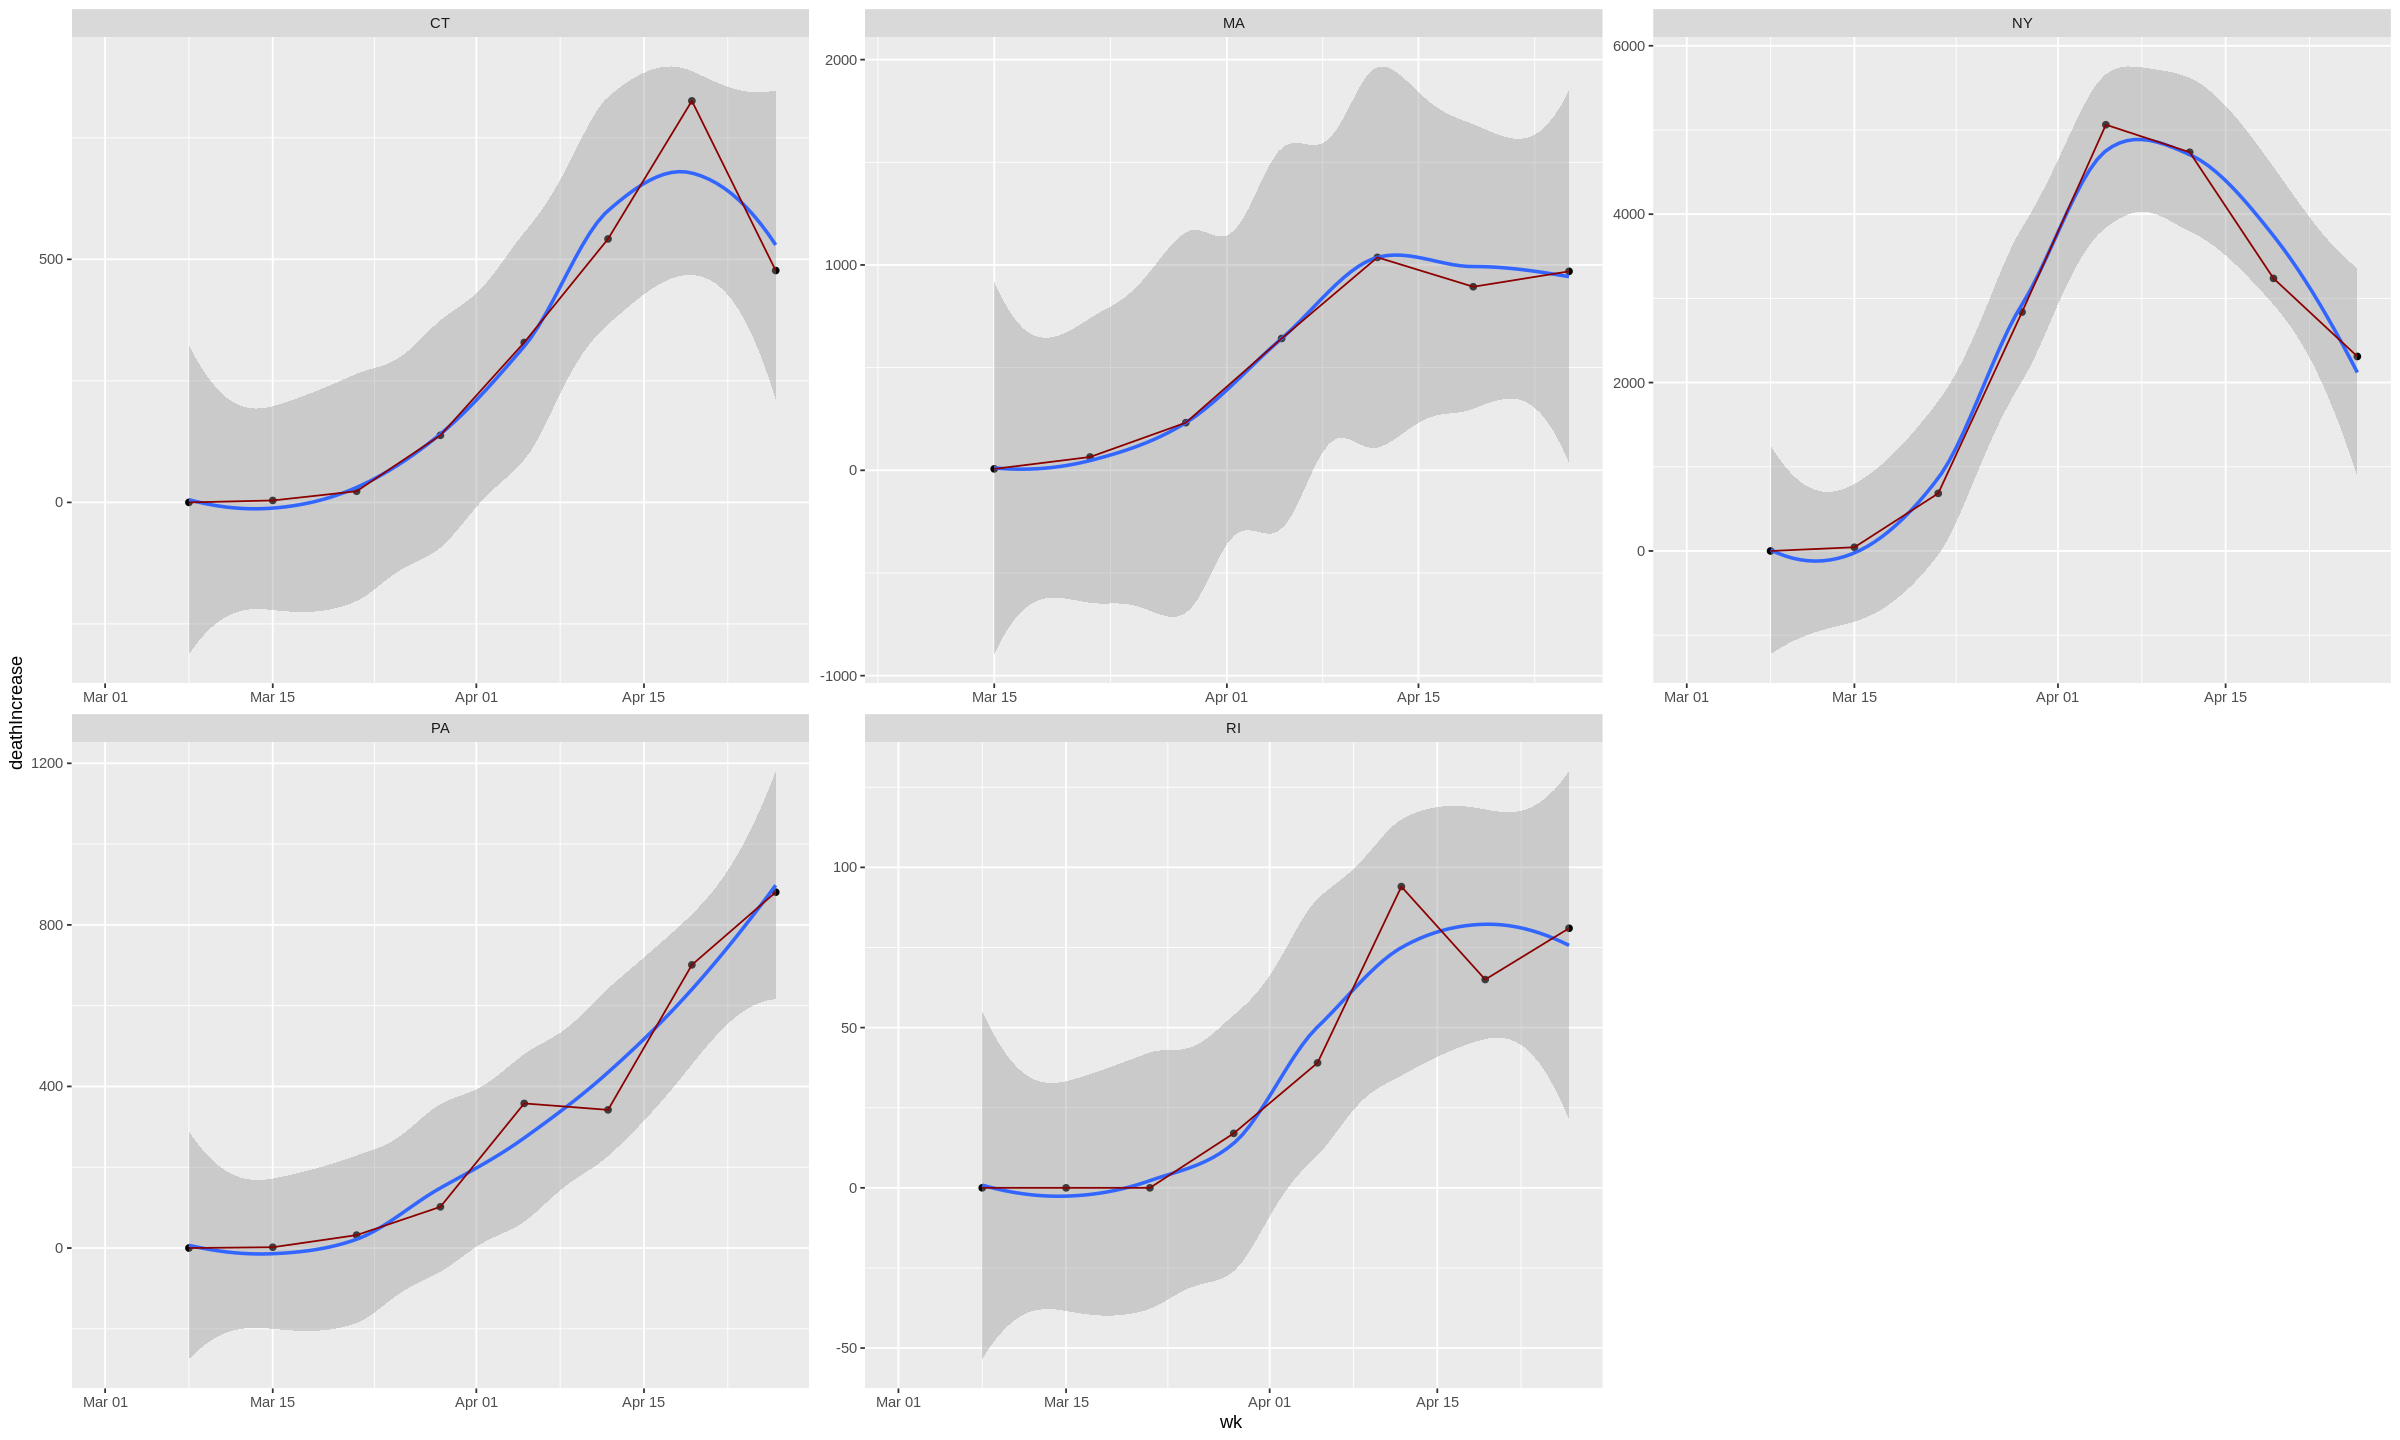

In [0]:
library(lubridate) 
state <- df %>% select(wk, dt, state, positiveIncrease, deathIncrease) %>% 
filter(state %in% c("PA","NY","CT","RI","MA") & dt < as.Date("2020-05-03")) %>% 
arrange(state, dt) %>%
select(-dt) %>%
group_by(state, wk) %>% 
summarize_all(sum)
head(state)
tail(state)

unique(state$wk)

options(repr.plot.width=20, repr.plot.height=12)

ggplot(state, aes(wk, deathIncrease), na.rm=TRUE) + 
geom_point() +
geom_smooth() + 
expand_limits(wk = 0, deathIncrease = 0) +
geom_line(color="darkred") +
facet_wrap(state ~ ., scale="free")

In [0]:
dd <- df %>%
filter(dt < as.Date("2020-05-10") & state != "NY") %>%
group_by(wk) %>%
summarize(deathIncrease = sum(deathIncrease, na.rm=TRUE))
head(dd)

wk,deathIncrease
<date>,<dbl>
2020-01-19,0
2020-01-26,0
2020-02-02,0
2020-02-09,0
2020-02-16,0
2020-02-23,5


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 56 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 56 row(s) containing missing values (geom_path).”


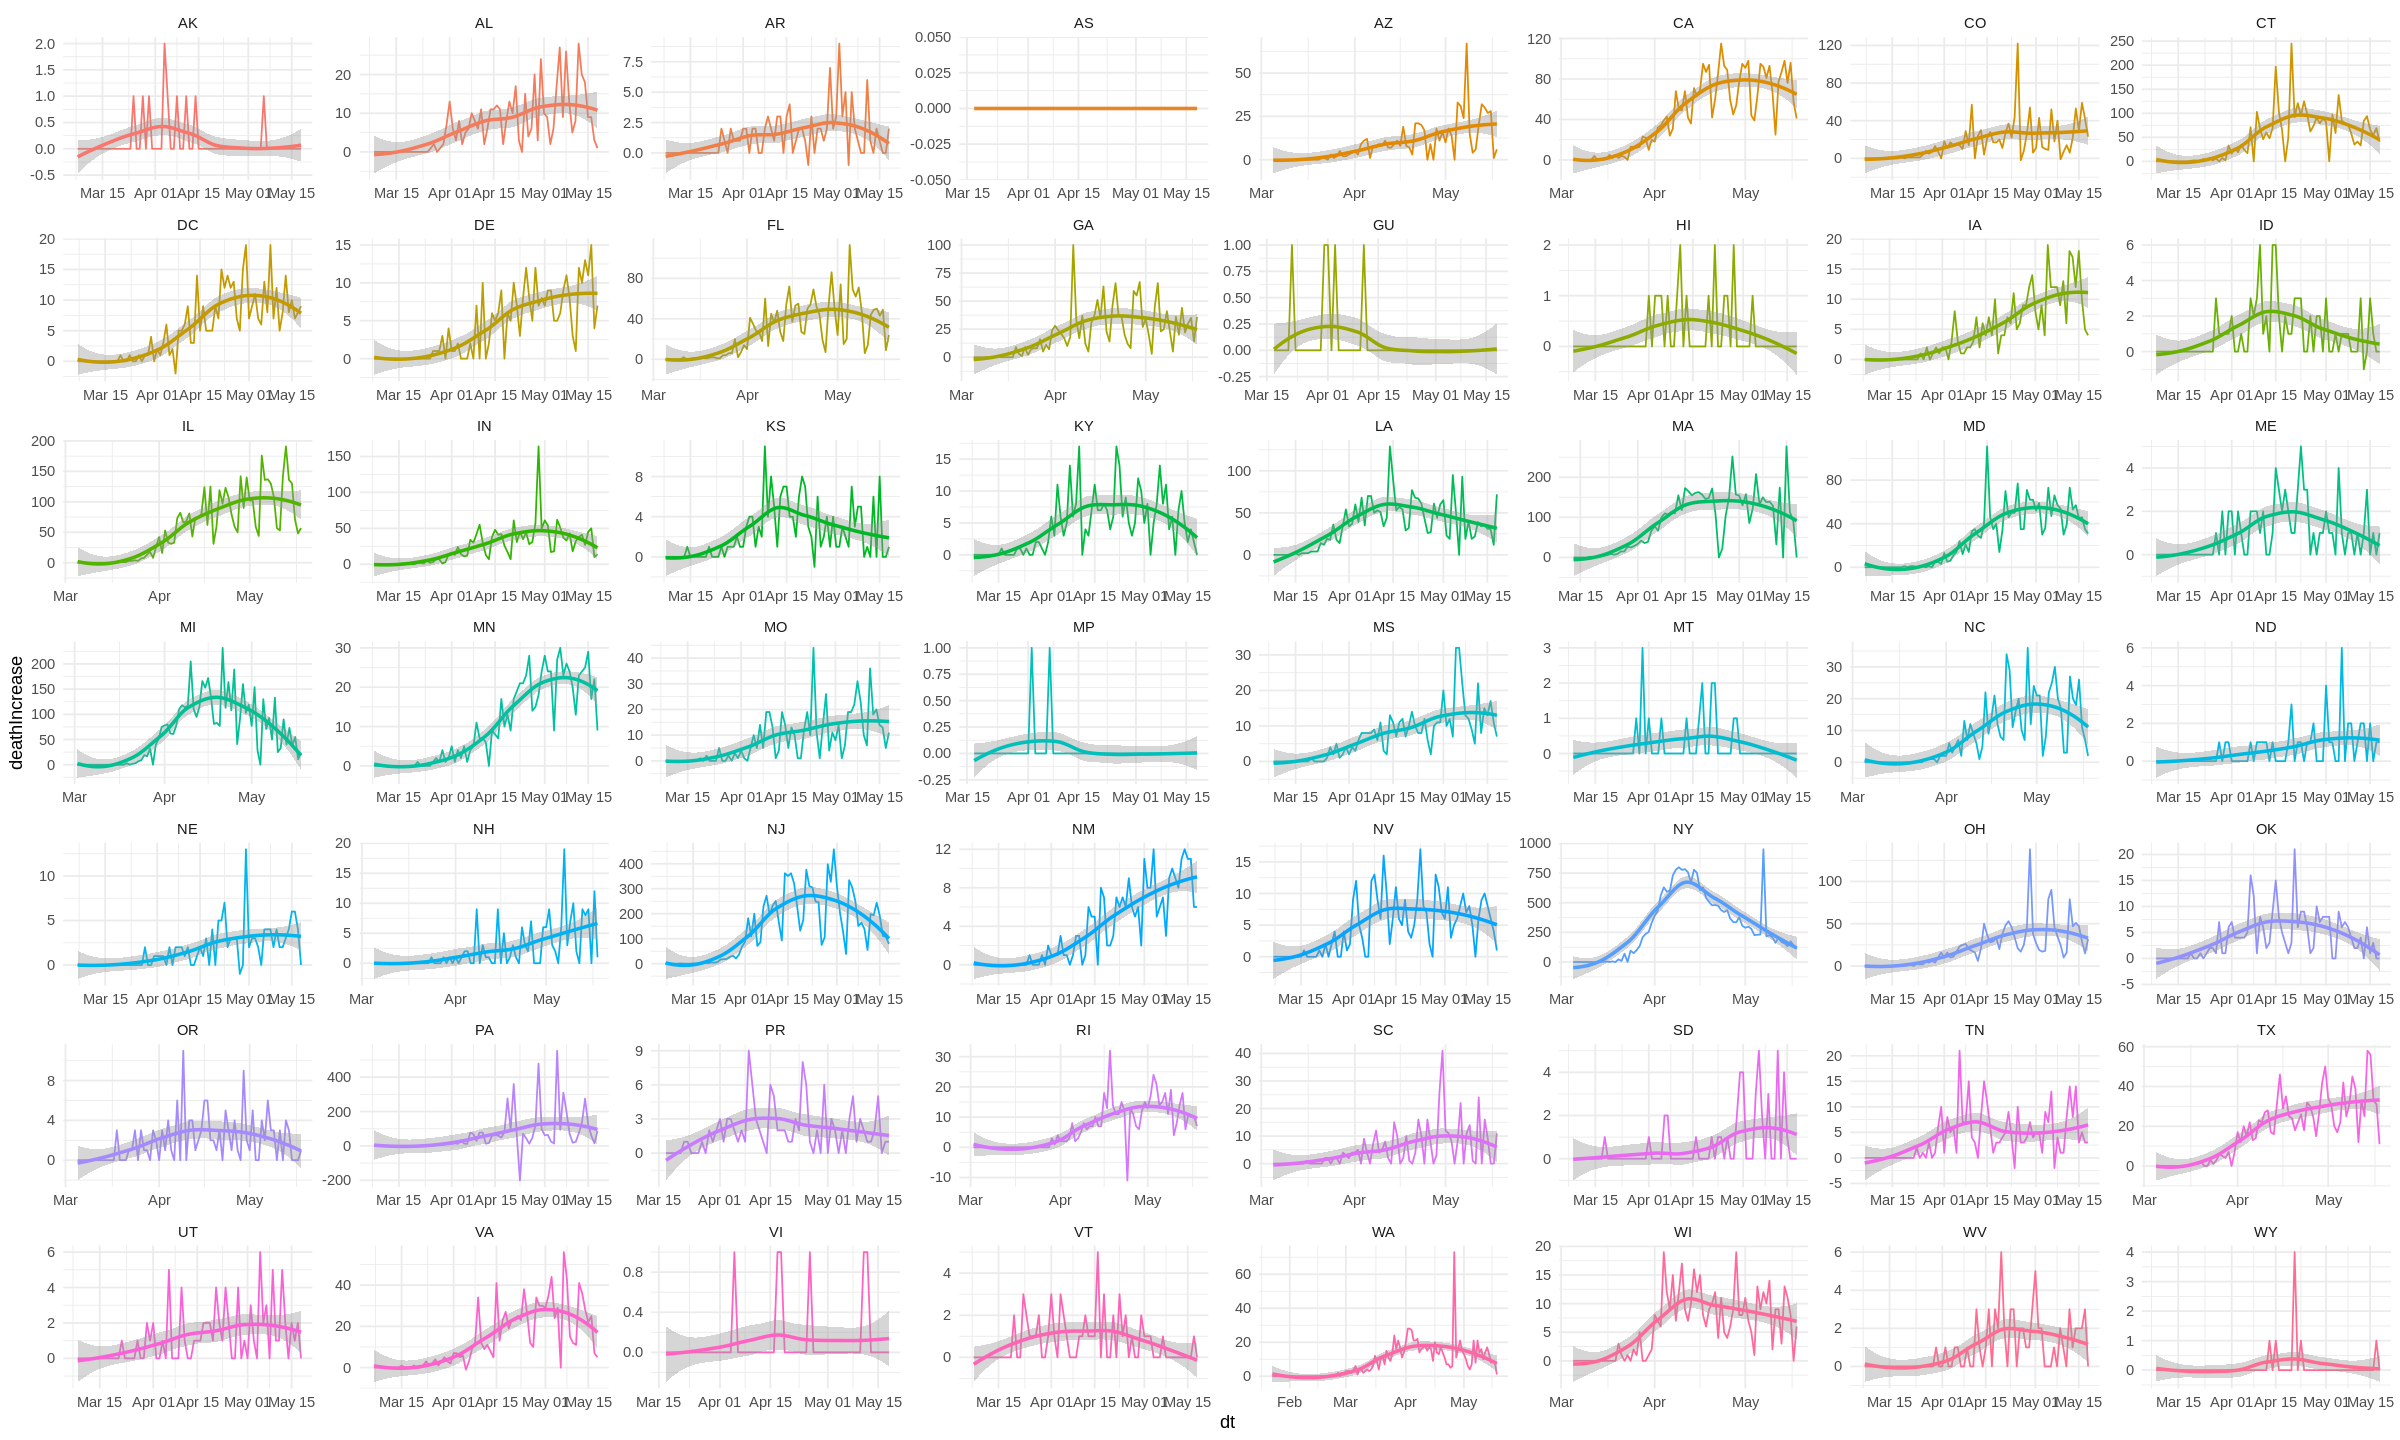

In [0]:
df <- df %>% arrange(state, dt) 
ggplot(df, aes(dt, deathIncrease, color=state)) + 
    geom_line() + 
    geom_smooth() +
    #geom_col(aes(fill=state, alpha=0.5, stat.bin=7)) +
    facet_wrap(~state, scale="free") + 
    theme_minimal() + 
    theme(legend.position="none")


Above is a smoothed loess curve of what has happened to date for deathIncrease (from https://covidtracking.com) using only reported deaths with no attempt to estimate actual deaths based on underreporting. Below is the same data summed by week. The data aggregated by week eliminates some of the variation due to extraneous causes such as paper work backlog, etc. This level of aggregation is only informative if the date associated with the count of deathIncrease is not properly attributed to the actual date of death, which has been reported as both typical and widespread (https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html). Also, this level of aggregation is only useful if the inaccuracy results in worse estimates of reality in models. Given the likely inaccuracy of the actual date of death in this data, an aggregated number based on the cycle of the error, such as weekend, weekly summated deathIncrease is a number I would be willing to put more faith in when looking at raw numbers and in feeding into a set of equations. This is how the CDC reports weekly influenza and pneumonia data, perhaps for similar reasons or perhaps simply to reduce file sizes. 

In my work in gaming and hospitality, the opposite is often true in that there is weekly seasonality that is important to properly model what is happening in reality and to identify and understand potential causal levers. In that context, not using day level hides reality in the same way that using day level hides reality in the covid-19 data.




`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 56 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 56 row(s) containing missing values (geom_path).”


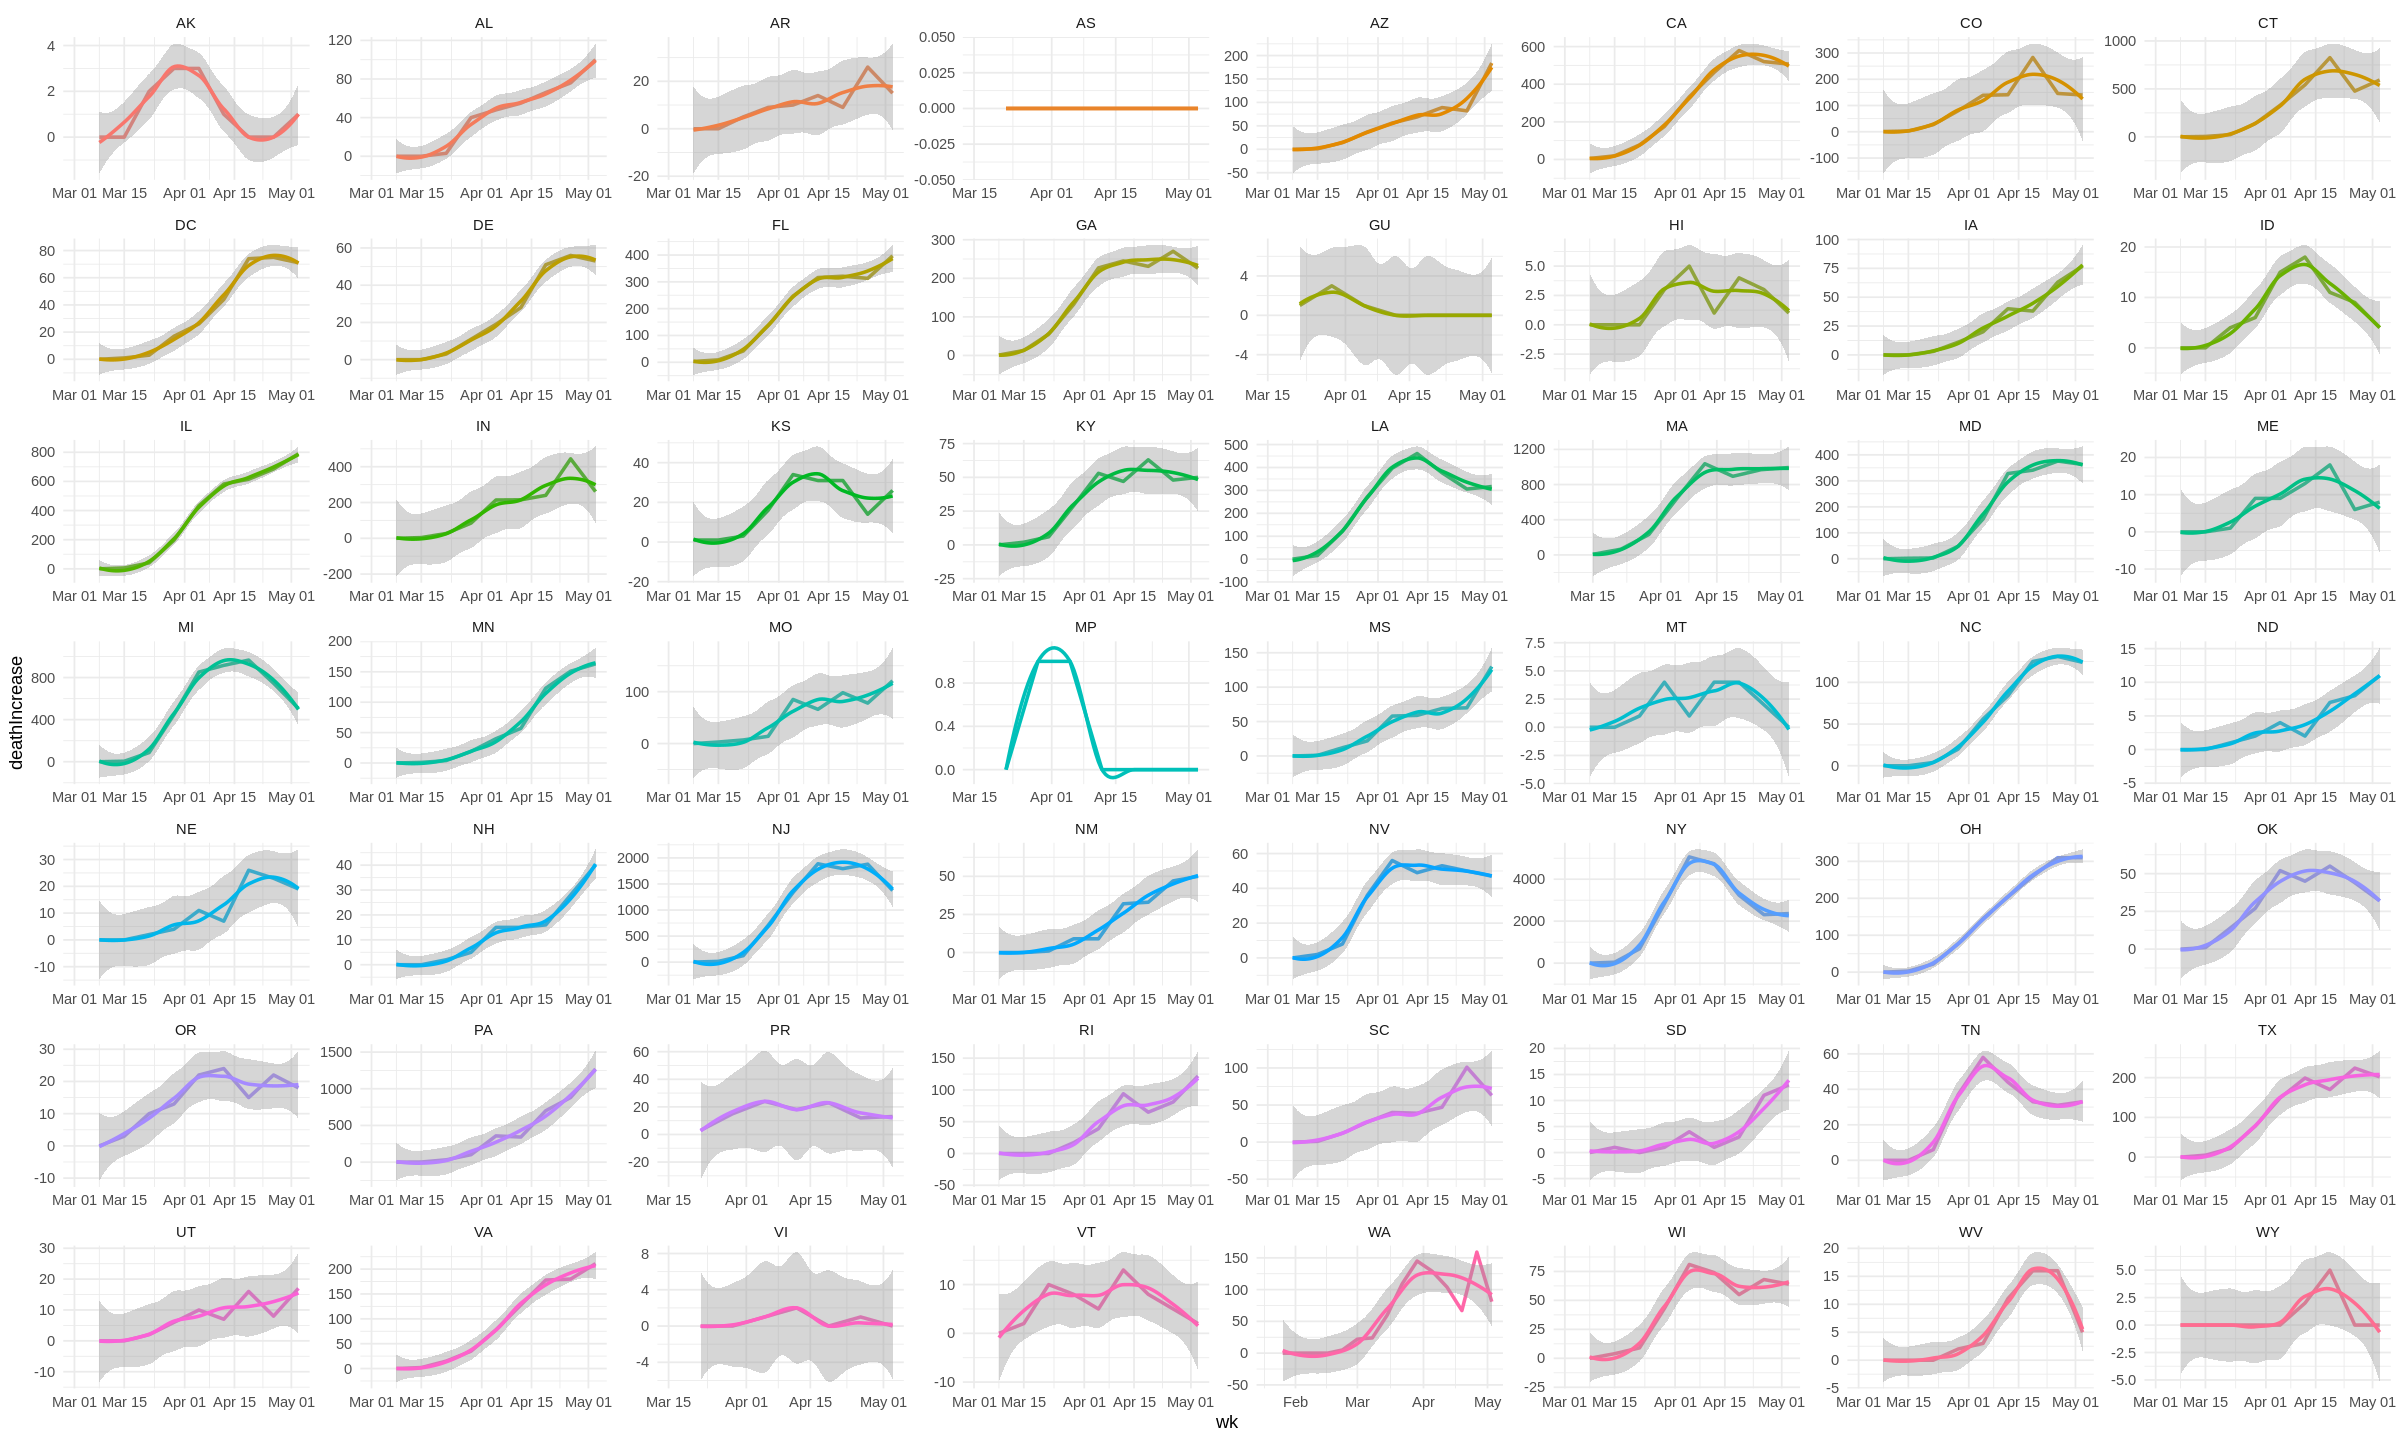

In [0]:
wk <- df %>% 
filter(dt < as.Date("2020-05-10")) %>% 
group_by(state, wk) %>% summarize(deathIncrease=sum(deathIncrease)) %>% arrange(state, wk)

ggplot(wk, aes(wk, deathIncrease, color=state)) + 
    geom_line(show.legend=FALSE, size=1) + 
    geom_smooth() +
    #geom_col(aes(fill=state, alpha=0.25)) +
    facet_wrap(~state, scale="free") + 
    theme_minimal() + 
    theme(legend.position="none")

In [0]:
wk_all <- df %>% filter(dt > as.Date("2020-02-02") & dt < as.Date("2020-05-10")) %>% 
group_by(wk) %>% 
summarize(deathIncrease=sum(deathIncrease, na.rm))
wk_all
#ggplot(wk_all, aes(wk, deathIncrease, color=wk)) + 
 #   geom_line(show.legend=FALSE) + 
  #  geom_col(aes(fill=state, alpha=0.25)) +
   # theme_minimal() + 
    #theme(legend.position="none")

wk,deathIncrease
<date>,<dbl>
2020-02-02,0
2020-02-09,0
2020-02-16,0
2020-02-23,5
2020-03-01,NA
2020-03-08,NA
2020-03-15,NA
2020-03-22,1732
2020-03-29,6449


In [0]:
di <- df %>% 
 arrange(state, dt) %>% 
  filter(deathIncrease > 10)%>% 
  group_by(state) %>%    
    mutate(index = row_number()) %>% 
  filter(state %in% c("NY", "CT","RI","MA")) %>%
  select(dt, index, state, deathIncrease)

di_loess <- loess(deathIncrease ~ index, data=di, span=0.75)
names(di_loess)
summary(di_loess)

ggplot(di, aes(index, deathIncrease, color=state, label=state)) + 
geom_point() + 
geom_line() + 
geom_smooth() 

plot(di_loess$x, di_loess$residuals)



In [0]:
wi <- wk %>% 
 arrange(state, wk) %>% 
  filter(deathIncrease > 10)%>% 
  group_by(state) %>%    
    mutate(index = row_number()) %>% 
  filter(state %in% c("NY","CT","RI","MA")) %>%
  select(wk, index, state, deathIncrease)

wi_loess <- loess(deathIncrease ~ index, data=wi, span=0.25)
names(wi_loess)
summary(wi_loess)

ggplot(wi, aes(index, deathIncrease, color=state, label=state)) + 
geom_point() + 
geom_line() + 
geom_smooth() 

# Comparison of 2 approaches to modeling viral transmission of covid-19.

My intent here is to contrast the above curve fitting exercise with two approaches to viral transmission modeling intended to inform estimation of the reproduction rate of the virus. The value of this exercise for me is to better understand approaches to modeling that may be of use in my own work in different domains. I am not an expert in biology nor epidemiology and thus this is a learning experience. Any criticism provided will be limited to the clarity of the communication for a semi-educated consumer of this information as well as my understanding of how the approaches differ and what that seems to imply about our understanding of the future of this pandemic.

To the best of my ability I will attempt to replicate the analyses using Stan software along with available data and simulation if some required data are not available.

## 1. Individual variation in susceptibility or exposure to SARS-CoV-2 lowers the herd immunity threshold

paper: https://www.medrxiv.org/content/10.1101/2020.04.27.20081893v1

A paper by Gomes et. al (2020) describes a "compartment model" (https://en.wikipedia.org/wiki/Multi-compartment_model) that includes the construct "susceptibility" (https://en.wikipedia.org/wiki/Susceptibility) which is characterized by both an inability to generate a biological defense to covid-19 as well as frequency of interpersonal interactions indicated by the size of one's interpersonal network. Those high on both of these would be the most susceptible to both infection plus a severe case experience. Some of the variation in biological susceptibility has been posited in other research as possibly genetic (Nguyen, et. al (2020), https://jvi.asm.org/content/early/2020/04/16/JVI.00510-20) in the form of differences in human leukocyte antigen (https://en.wikipedia.org/wiki/Human_leukocyte_antigen).

The models put forth are rather complex for the average reader to understand as they incorporate mathematical integration (https://en.wikipedia.org/wiki/Integral) into the typical epidemiological compartment modeling, a tool of calculus used to model the effect of small changes in one continuous variable (or calculated factor) across small increments of another. 

Gomes et. al (2020) make one primary assertion supported by two models comparing simulated changes in inputs. The first of which includes variation in susceptibility and the second, variation in exposure to infectivity modeled as individual variation in connectivity.

1. Assertion: "Here we demonstrate that individual variation in susceptibility or exposure (connectivity) accelerates the acquisition of immunity in populations." 

In other words, if individual variation does in fact exist at some level, in this study simulated as a "coefficient of variation" (https://en.wikipedia.org/wiki/Coefficient_of_variation) value between 0 and 4 simulated by inputing integer values in the set (0, 1, 2, 3, 4), then the critical threshold for achieving "herd immunity" is substantially lower and thus will be achieved far more quickly than models that assume no individual variation estimate. 

2. Evidence: "We integrate continuous distributions of susceptibility or connectivity in otherwise basic epidemic models for COVID-19 and show that as the coefficient of variation increases from 0 to 4, the herd immunity threshold declines from over 60% to less than 10%."

The three compartments each contain an equation. First, is an equation that estimates susceptibility using the count of individuals that vary by the susceptibility value. Second, is an equation that estimates the exposure rate which varies by susceptibility value. Third, is an equation that estimates the rate of exposure to infection which varies as a function of exposure and, recovery or death.

The first two compartments include a parameter described as "the average force of infection upon susceptible individuals in a population of size N." This parameter is calculated by integrating across an additive model of the relationship between a function of exposure (i.e., multiplied by a factor of infectivity) and a function of the number infectious. 

3. Future: "Measures of individual variation are urgently needed to narrow the estimated ranges of herd immunity thresholds and plan accordingly."

In [0]:
!apt install -y graphviz
!pip install graphviz

In [0]:
from graphviz import Digraph

tree = Digraph()

tree.edge("x > 5?\n[20, 20]", "blue\n[15, 0]", "No")
tree.edge("x > 5?\n[20, 20]", "y > 3?\n[5, 20]", "Yes")

tree.edge("y > 3?\n[5, 20]", "x > 9?\n[4, 6]", "No")
tree.edge("y > 3?\n[5, 20]", "almost orange\n[1, 14]", "Yes")

tree.edge("x > 9?\n[4, 6]", "blue\n[4, 0]", "No")
tree.edge("x > 9?\n[4, 6]", "orange\n[0, 6]", "Yes")

tree.edge("almost orange\n[1, 14]", "Should we continue?\nOr would it be overfitting?")

tree

In [0]:
Susceptibility = (-1)*avg_force_of_infection * susceptibility * freq(susceptibility_level)
Exposed = avg_force_of_infection * susceptibility * freq(susceptibility_level) - rate_progression_exposed_to_infectious * freq(exposed_level)
Infectious = rate_progression_exposed_to_infectious * freq(exposed_level) - rate_of_recovery * freq(infectious_level)

# An equation for the average force of infection is embedded within the calculation of the first two compartments above.

avg_force_of_infection = (Beta/N) * integral([infectivity * freq(exposed_level) + freq(infectious_level)) / dx

# An equation for the "basic reproduction number for system (1)". 

Reproduction = mean_of_suseptibility_factor_at_onset * (Beta/N) * (infectivity in Exposed compartment equation/rate_progression_exposed_to_infectious) * 1/rate_of_recovery


## 2. Report 20: Using mobility to estimate the transmission intensity of COVID-19 in Italy: A subnational analysis with future scenarios

paper: https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/covid-19/report-20-italy/

Vollmer, et. al (2020) use the construct "mobility" which is defined by freedom of movement at baseline given whatever current set of government restrictions exist and at lockdown level restrictions.

In [0]:
dfi <- read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")

In [0]:
head(dfi)

In [0]:
ggplot(dfi, aes(data, totale_casi, color=denominazione_regione)) + 
  geom_point() + 
  geom_smooth() + 
  theme_minimal()